## More practice with jupyter and intro to curve fitting

ENGR 104

Begin with the usual imports. And then read in the sensor data -- our first goal will be to fit a regression line to the temperature data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('sensor_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           15 non-null     object 
 1   Location       15 non-null     object 
 2   Sensor_ID      15 non-null     object 
 3   Temperature_C  15 non-null     float64
 4   Humidity       15 non-null     int64  
 5   PM2.5          15 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 852.0+ bytes


Now we right our own function find the *linear* line of best fit for a data set $(x_1,y_2), (x_2,y_2),...,(x_n,y_n)$</br>

We then return the slope and y-intercept for our temperature and humidity data from the data frame.

In [3]:
def lineFit(x,y):  #takes in the x and y data separately
    '''
    Return the slope and y-intercept of regression line best fitting your data
    '''
    xavg = x.mean()
    yavg = y.mean()
    slope = ((x-xavg)*y).sum()/((x - xavg)*x).sum()
    yint = yavg - slope *xavg
    return slope, yint

In [4]:
xData = df.Temperature_C
yData = df.Humidity
m, b = lineFit(xData,yData)

Now we'll build an array of y values on the line of best fit and plot that against the actual data.

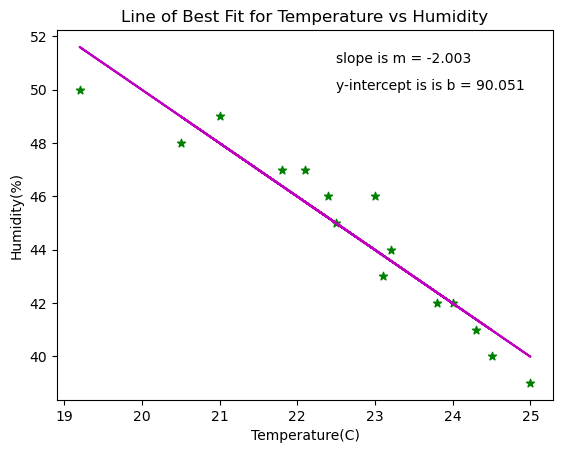

In [5]:
yPredicted = xData*m + b

fig, ax = plt.subplots()

ax.scatter(xData,yData, marker = '*', color = 'g')
ax.plot(xData, yPredicted, color = 'm')
ax.set_xlabel('Temperature(C)')
ax.set_ylabel('Humidity(%)')
ax.set_title('Line of Best Fit for Temperature vs Humidity')
ax.text(22.5,51, 'slope is m = {0:0.3f}'.format(m))
ax.text(22.5,50, 'y-intercept is is b = {0:0.3f}'.format(b))
plt.savefig('best_fit_temp_humidity.jpeg', dpi = 300)

In [6]:
x = 20 * rng.random(30) - 10  # 50 random x values in range [-10, 10]
y = 3 * x + 2.4 + rng.normal(0, 1, size=x.shape) 

newDf = pd.DataFrame({'X':x, 'Y':y})

newDf.to_csv('dummy_data.csv')

0     26.275090
1     13.455852
2    -12.037612
3     29.173896
4     19.760205
5     15.191189
6     -2.109116
7    -12.281085
8    -21.503028
9     27.394270
10     1.743308
11   -12.544336
12    -8.828193
13     6.163636
14   -19.125679
15    24.064569
16    17.098231
17    15.152420
18    -2.286514
19     9.897740
20     8.511858
21    11.547845
22   -22.691976
23    -3.687210
24   -26.777833
25     1.553141
26    -7.862110
27   -17.160619
28   -21.265547
29     8.641414
Name: Y, dtype: float64
2.9876044267706177 2.2944418187793785


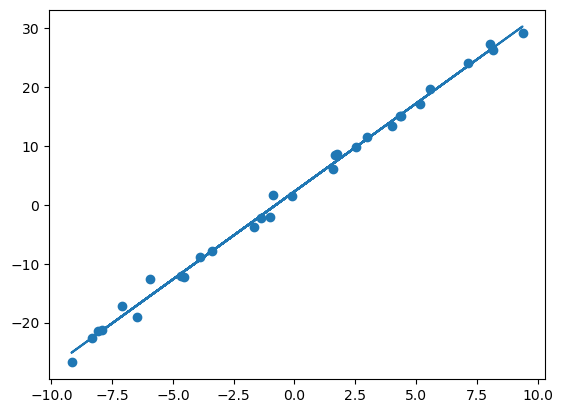

In [7]:
x = newDf['X']
y = newDf['Y']
print(y)
m,b = lineFit(x,y)

print(m,b)

y_predict = x * m + b

fig, ax = plt.subplots()

ax.scatter(x,y)
ax.plot(x,y_predict)


In [8]:
from numpy.random import default_rng
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Constants for the quadratic equation
a, b, c = -4.9, 14.3, 20

# Generating synthetic data
rng = default_rng(seed=42)  # For reproducibility
x = 4 * rng.random(50)  # 100 random x values in range [0, 4]
y = a * x**2 + b * x + c + rng.normal(0, 0.8, size=x.shape)  # Quadratic equation with noise

# Converting to a DataFrame for easier handling
df = pd.DataFrame({'time_s': x, 'height_m': y})

df.to_csv('projectile_data.csv', index = False)

In [9]:
projDF = pd.read_csv('projectile_data.csv')
projDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time_s    50 non-null     float64
 1   height_m  50 non-null     float64
dtypes: float64(2)
memory usage: 932.0 bytes


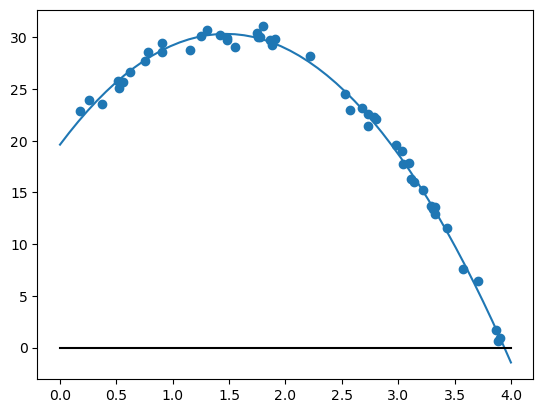

In [14]:
plt.scatter(df.time_s, df.height_m)
plt.plot(np.linspace(0,4,50),model(np.linspace(0,4,50)))
plt.plot(np.linspace(0,4,50), np.zeros(50), color = 'black')

In [15]:
model = np.poly1d(np.polyfit(projDF['time_s'], 
                             projDF['height_m'], 2)) 
from sklearn.metrics import r2_score 
print(model)
print(r2_score(projDF['height_m'],  
               model(projDF['time_s']))) 

        2
-4.963 x + 14.58 x + 19.63
0.9948228611395804


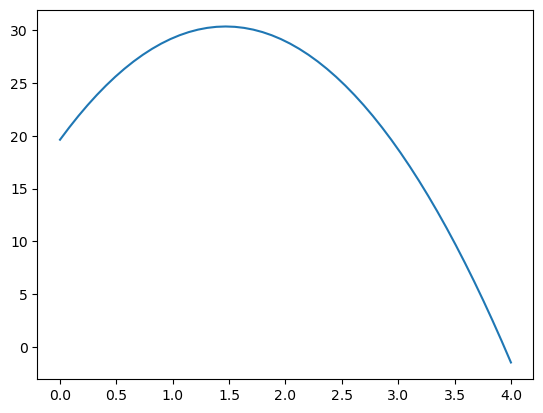

In [13]:
np.roots(model)

array([ 3.94175643, -1.00328981])